In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append('/home/raven/Documents/CS/CS543_ML/vscode')
from hroml import myfunctions as mf


In [2]:
cardata = pd.read_csv('cardata.csv')

In [3]:
cardata

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
cardata.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
cardata.columns = cardata.columns.str.lower().str.replace(' ', '_')
string_columns = list(cardata.dtypes[cardata.dtypes == 'object'].index)
for col in string_columns:
    cardata[col] = cardata[col].str.lower().str.replace(' ','_')

In [6]:
for i in cardata.columns:
    print(i)
    print(cardata[i].unique())
    print("\n")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']


model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti' '

In [7]:
# sns.pairplot(cardata)

In [8]:
cardata.corr()

/tmp/ipykernel_57245/2059604511.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cardata.corr()


,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
engine_hp,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
engine_cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
number_of_doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway_mpg,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city_mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
msrp,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


<Axes: xlabel='msrp', ylabel='Count'>

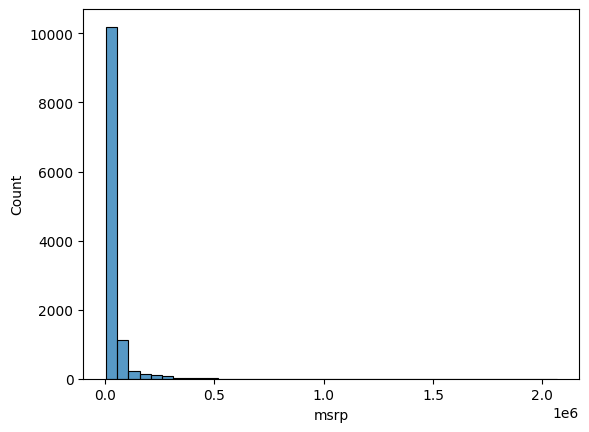

In [9]:
sns.histplot(cardata.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

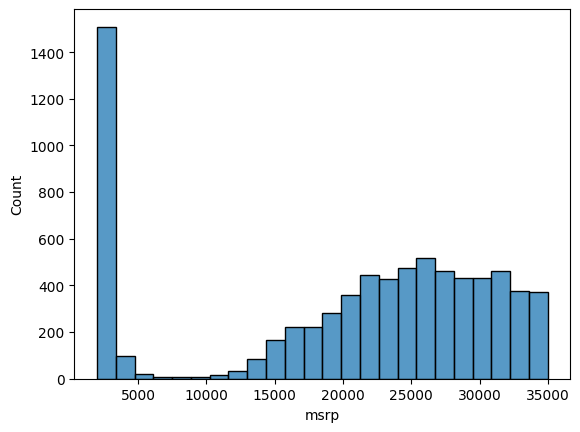

In [10]:
sns.histplot(cardata.msrp[cardata.msrp < 35000])

In [11]:
log_price = np.log1p(cardata.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

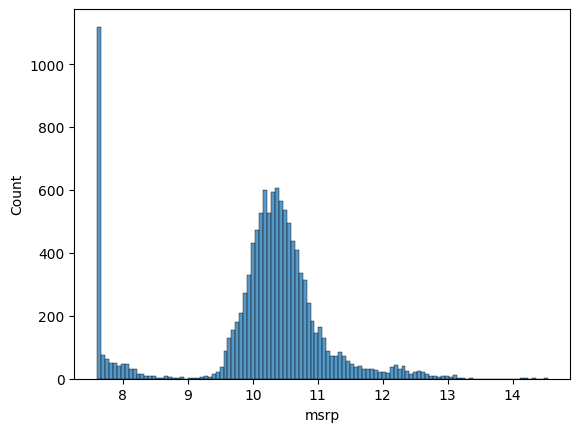

In [12]:
sns.histplot(log_price)

In [13]:
cardata.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [14]:
cardata_train, cardata_val, cardata_test = mf.train_val_test_split(cardata,0.6,0.2,0.2,'MSRP',5)

y_train = cardata_train.msrp
y_val = cardata_val.msrp
y_test = cardata_test.msrp

del cardata_train['msrp']
del cardata_val['msrp']
del cardata_test['msrp']

# length = len(cardata)
# constant = 5
# val_p = 0.2
# test_p = 0.2
# train_p = 0.6

# n_val = int(val_p * length)
# n_test = int(test_p * length)
# n_train = int(train_p * length)

# np.random.seed(constant)
# idx = np.arange(length)
# np.random.shuffle(idx)

# cardata_shuffled = cardata.iloc[idx]

# cardata_train = cardata_shuffled.iloc[:n_train].copy()
# cardata_val = cardata_shuffled.iloc[n_train:n_train+n_val].copy()
# cardata_test = cardata_shuffled.iloc[n_train+n_val:].copy()

In [15]:
cardata_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
3863,hyundai,elantra,2016,regular_unleaded,173.0,4.0,automatic,front_wheel_drive,4.0,performance,compact,sedan,35,24,1439
7113,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,22,586
917,audi,90,1995,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,compact,sedan,23,17,3105
3833,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,37,27,1439
1312,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,bentley,continental_gt,2014,premium_unleaded_(required),521.0,8.0,automatic,all_wheel_drive,2.0,"exotic,factory_tuner,luxury,high-performance",midsize,coupe,24,15,520
10347,gmc,terrain,2015,regular_unleaded,182.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,29,20,549
6815,infiniti,m,2012,premium_unleaded_(required),330.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,24,17,190
2055,subaru,brz,2017,premium_unleaded_(required),205.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,29,21,640


In [16]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = cardata_train[base]

In [17]:
df_num = df_num.fillna(0)

In [18]:
X_train = df_num.values

In [19]:
w_0, w = mf.train_linear_regression(X_train, y_train)

In [20]:
y_pred = w_0 + X_train.dot(w)

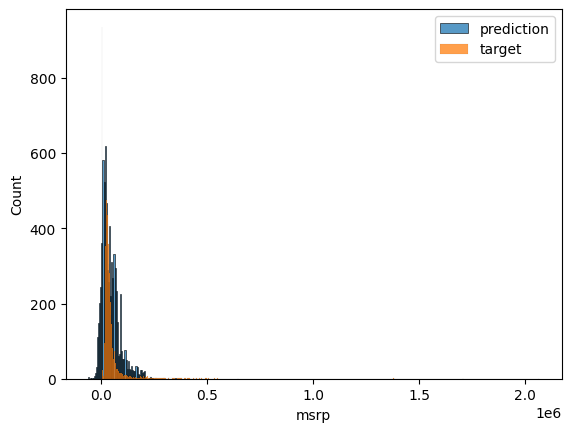

In [21]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

RMSE

In [22]:
mf.rsme(y_train, y_pred)

47248.54466717179

Validation

In [31]:
df_num = cardata_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [32]:
y_pred = mf.lin_regress(w_0, X_val, w)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [30]:
mf.rsme(y_val, y_pred)

ValueError: operands could not be broadcast together with shapes (5,) (2382,) 